In [1]:
import state_utils

host = "am"
state_utils.set_host(host)
state_utils.set_midas_db_type("standard")
state_utils.set_cohort("Poyet")

from parse_midas_data import parse_good_species_list
import config
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle

import seaborn as sns
import figure_utils as fu
 
import matplotlib
from matplotlib import cm


In [2]:

all_samples = config.host_samples
good_species = parse_good_species_list()
dates = config.dates


In [3]:
pi_dir = "%s/pi/%s/%s" % (config.analysis_directory,config.cohort,host)

In [4]:
pi_df_BT = pd.DataFrame(columns=all_samples,index=good_species)
pi_df_W = pd.DataFrame(columns=all_samples,index=good_species)

for species in good_species:
    try:
        pi_df = pd.read_csv("%s/%s_pi.txt" % (pi_dir,species),index_col=0)
        pi_df_T = pd.DataFrame(columns=all_samples,index=all_samples)
        pi_df_T.loc[pi_df.index,pi_df.columns] = pi_df
        species_dates = dates.loc[pi_df.index].sort_values()
        first_date = species_dates.index[0]
        pi_df_BT.loc[species] = pi_df_T.loc[first_date]
        pi_df_W.loc[species] = np.diag(pi_df_T)
        
    except:
        pass
    
pi_df_W = pi_df_W.loc[:,[d for d in dates.index if d in pi_df_W.columns]]
pi_df_BT = pi_df_BT.loc[:,[d for d in dates.index if d in pi_df_BT.columns]]

## in keeping with the rest of the paper, filter out species for which SNVs were inferred 
## in less than 25 samples
pi_df_W = pi_df_W.loc[pi_df_W.T.notna().sum() > 25]
pi_df_BT = pi_df_BT.loc[pi_df_W.index]

pi_df_W = pi_df_W.loc[pi_df_W.index[::-1]]

## dropping aberrant sample in ae
if host == "ae":
    pi_df_W = pi_df_W.drop(pi_df_W.mean().idxmax(),axis=1)

# filter out nan's for boxplotting purposes
all_arr = [pi_df_W.loc[d][~np.isnan(list(pi_df_W.loc[d]))].values for d in pi_df_W.T]

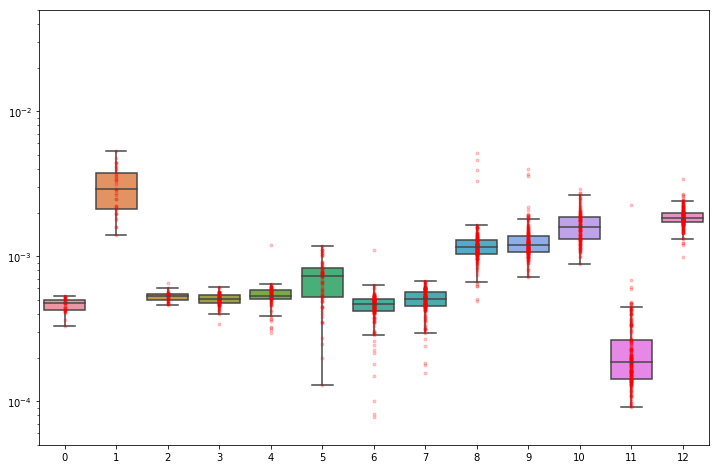

In [5]:
fig,ax=plt.subplots(figsize=(12,8))
sns.boxplot(data=all_arr,ax=ax, showfliers=False)
for x in range(len(all_arr)):
    ax.plot(np.ones(len(all_arr[x]))*x, all_arr[x], 'r.', alpha=0.2)
ax.set_ylim([5*1e-5,5*1e-2])

ax.semilogy();

In [ ]:
fig,ax=plt.subplots(figsize=(12,8))
fig.suptitle(host,fontstyle="italic",size=30)
sns.violinplot(data=all_arr,ax=ax, showfliers=False,boxprops=dict(alpha=.1),orientation="vertical")
for x in range(len(all_arr)):
    
    norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

    #colormap possible values = viridis, jet, spectral
    rgba_color = cm.plasma(norm(np.linspace(0.0,1,len(all_arr[x])))) 
    rgba_color = [r for r in rgba_color]
    
    ax.scatter(all_arr[x], np.ones(len(all_arr[x]))*x, s=150,color=rgba_color,alpha=.7)
    
ax.set_xlim([5*1e-6,5*1e-2])

species_names = [fu.get_pretty_species_name(s) for s in pi_df_W.index]
ax.set_yticks(range(len(species_names)))
ax.set_yticklabels(species_names,rotation=0,fontstyle='italic')

ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=12,rotation=0,pad=10)

ax.set_xlabel(r"$\pi$",size=25)

ax.grid(True,alpha=.3)
ax.semilogx();

Text(0.5,0,'$\\pi$')

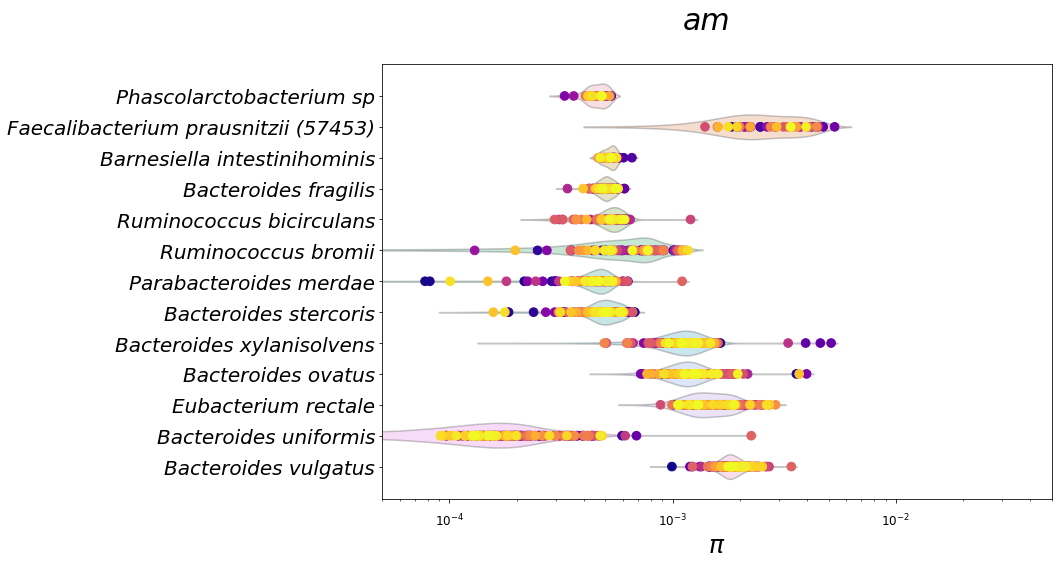

In [7]:
fig,ax=plt.subplots(figsize=(12,8))
fig.suptitle(host,fontstyle="italic",size=30)
sns.violinplot(data=all_arr,ax=ax, showfliers=False,inner=None,orient='h',scale='width')
plt.setp(ax.collections, alpha=.3)

for x in range(len(all_arr)):
    
    norm = matplotlib.colors.Normalize(vmin=0, vmax=1)

    #colormap possible values = viridis, jet, spectral
    rgba_color = cm.plasma(norm(np.linspace(0.0,1,len(all_arr[x])))) 
    rgba_color = [r for r in rgba_color]
    
    ax.scatter(all_arr[x], np.ones(len(all_arr[x]))*x, s=75,color=rgba_color,alpha=1)
    
ax.semilogx();
ax.set_xlim([5*1e-5,5*1e-2])

species_names = [fu.get_pretty_species_name(s) for s in pi_df_W.index]
ax.set_yticks(range(len(species_names)))
ax.set_yticklabels(species_names,rotation=0,fontstyle='italic')

ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=12,rotation=0,pad=10)

ax.set_xlabel(r"$\pi$",size=25)


In [ ]:
import matplotlib as mpl

In [ ]:
fig, ax = plt.subplots(figsize=(1.5,8))
col_map = plt.get_cmap('plasma')


cbar = mpl.colorbar.ColorbarBase(ax, cmap=col_map,
                          orientation = 'vertical',
                         ticks=[])
cbar.set_alpha(.5)
#cbar.set_xticklabels(["Older","Newer"])